In [1]:
import numpy as np
import scipy as sc
import sympy as sp
import matplotlib.pylab as plt

## **Regla del trapecio**

Use la siguiente fórmula:

$\int_{a}^{b} f(x)\, dx = \frac{b-a}{2}(f(a)+f(b))- \frac{(b-a)^3}{12} f(\epsilon)$

In [2]:
#Analizando la recurrencia solo para dos puntos
x_=np.array([2,3,5])
y_=np.array([4,6,1])

n_trapecios_1= (x_[1]-x_[0])/2 * (y_[1]+y_[0])
print(n_trapecios_1)
n_trapecios_2= (x_[2]-x_[1])/2 * (y_[2]+y_[1])
print(n_trapecios_2)
n_trapecios= n_trapecios_1 + n_trapecios_2
n_trapecios

5.0
7.0


12.0

In [3]:
#Creación de un ciclo con intento para tres puntos
x=np.array([2,3,5,4])
y=np.array([4,6,1,2])
n_trapecios=0
for i in range(0,len(x)-1):
    n_trapecios_1= (((x[i+1]-x[i])/2)*(y[i+1]+y[i]))
    n_trapecios+=n_trapecios_1
    print(n_trapecios)

5.0
12.0
10.5


Generalización del código

In [4]:
#Datos iniciales
a=1
b=2
N=5
x=np.linspace(a,b,N)
H=x[1]-x[2]
f=lambda x: x**2

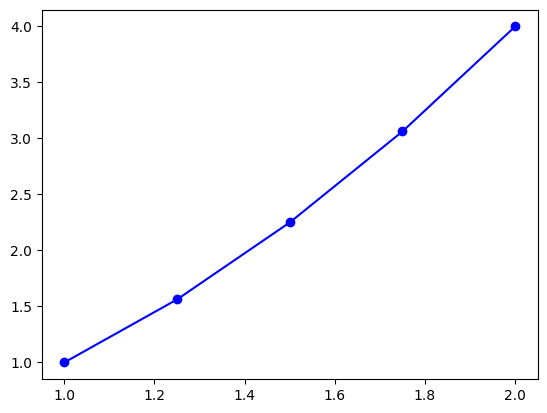

In [5]:
#Gráfico
plt.figure()
plt.plot(x,f(x),"bo-")
plt.show()

In [6]:
#Cálculo de la integral
def integral_trapz(f,a,b,N):
    x=np.linspace(a,b,int(N))
    h=(b-a)/N
    A=(f(x[0])+f(x[-1])+ 2*f(x[1:-1]).sum())*h*0.5
    return A

In [7]:
#Area en terminos de la integral
A= integral_trapz(f,0,1,N=10)
print(A)

0.3018518518518518


In [8]:
N=np.linspace(100,1000,10)
areas=np.zeros(len(N))
for i ,n_ in enumerate(N):
    areas[i]=integral_trapz(f,0,1,n_)

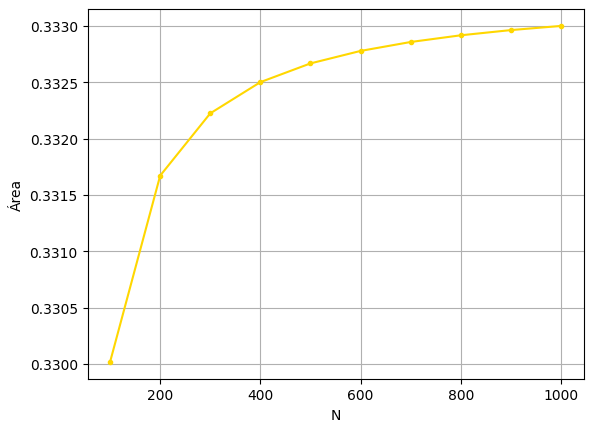

In [9]:
plt.figure()
plt.plot(N,areas,".-",c="gold")
plt.xlabel("N")
plt.ylabel("Área")
plt.grid(True)
plt.show()

Comparación

In [10]:
#Comparación de los métodos
integralf=integral_trapz(f,a,b,1000)
print(f"Por medio de la deducción obtenemos que el cálculo de integral mediante trapecios es:{integralf}")

xn_=np.linspace(a,b,1000)
intregral_met_trapz=sc.integrate.trapezoid(f(xn_),xn_)
print(f"usando la librería trapezoid obtenemos que la integración es: {intregral_met_trapz}")

Por medio de la deducción obtenemos que el cálculo de integral mediante trapecios es:2.3310001668335
usando la librería trapezoid obtenemos que la integración es: 2.333333500333834


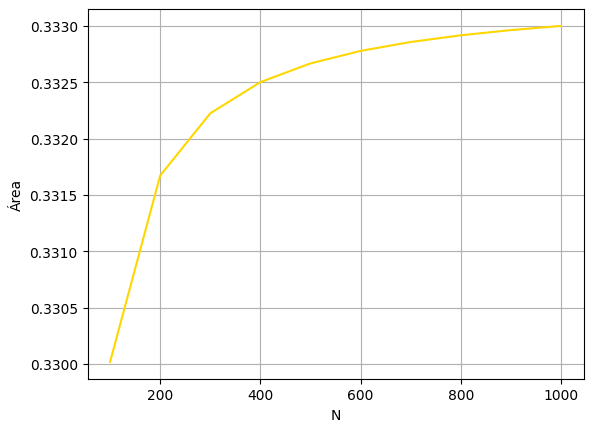

In [11]:
plt.figure()
plt.plot(N,areas,"gold")
plt.xlabel("N")
plt.ylabel("Área")
plt.grid(True)
plt.show()

## **Regla del Trapecio Compuesta**

Use la siguiente formula

$E=-\frac{(b-a)^3}{12n^2} f''(\epsilon)$

In [12]:
x=sp.Symbol("x")
f=(((x-1)**2)*(sp.sin(x)))/3 + 1

In [13]:
dev_1=sp.diff(f,x)
dev_1

(x - 1)**2*cos(x)/3 + (2*x - 2)*sin(x)/3

In [14]:
dev_2=sp.diff(dev_1,x)
dev_2

-(x - 1)**2*sin(x)/3 + 2*(2*x - 2)*cos(x)/3 + 2*sin(x)/3

In [15]:
#Función y derivadas
f_=lambda x_:(((x_-1)**2)*(sp.sin(x_)))/3 + 1
fp1=lambda x_:((x_ - 1)**2*sp.cos(x_))/3 + ((2*x_ - 2)*sp.sin(x_))/3
fp2=lambda x_:(-(x_ - 1)**2*sp.sin(x_))/3 + (2*(2*x_ - 2)*sp.cos(x_))/3 + (2*sp.sin(x_))/3

#Nociones preliminares
b=2
a=0

#Error
Err=1E-3

In [16]:
q=sp.lambdify(x,f_(x))
r=sp.lambdify(x,fp1(x))
s=sp.lambdify(x,fp2(x))

In [17]:
fp2_invertida= lambda x_:(-1)*s(x_)
max=sc.optimize.fmin_powell(fp2_invertida,0.01)

Optimization terminated successfully.
         Current function value: -0.720789
         Iterations: 2
         Function evaluations: 19


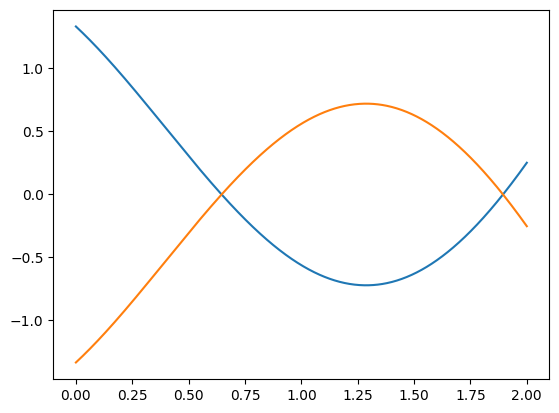

In [18]:
x_=np.linspace(0, 2, 1000)
plt.plot(x_,fp2_invertida(x_))
plt.plot(x_,s(x_))

In [19]:
max

array([1.2873146])

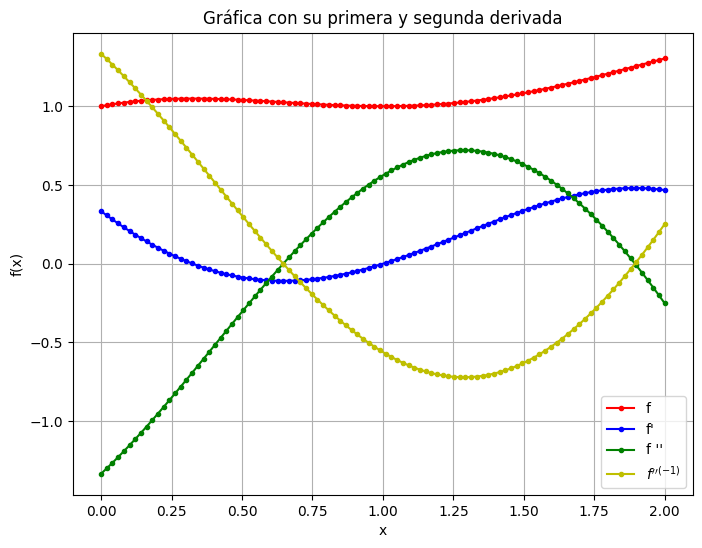

In [20]:
x1=np.linspace(a,b,100)
plt.figure(figsize=(8,6))
plt.plot(x1,q(x1),".r-", label="f")
plt.plot(x1,r(x1),".-b", label="f'")
plt.plot(x1,s(x1),".-g", label="f ''")
plt.plot(x1,fp2_invertida(x1),".-y", label="$f''^{(-1)}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica con su primera y segunda derivada")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
n=np.sqrt(((b-a)**3)/(12*Err)*max)
n

array([29.2952169])

In [22]:
#Calculando la integral teniendo en cuenta que el error es de 1E-3
integral_f_=integral_trapz(q,a,b,n[0])
integral_f_

2.039847765581371

In [23]:
#Uso de scipy
x_=np.linspace(a,b,int(n[0]))
integral_f_trapz=sc.integrate.trapezoid(q(x_),x_)
integral_f_trapz

2.13420652645248

## **Método de Simpson**

Se usa la siguiente la formula:

$\int_{a}^{b} f(x)\, dx ≈ \frac{b-a}{6}[f(a)+4f(\frac{a+b}{2})+f(b)]$

In [24]:
f3= lambda x:x**3+1
a3=1
b3=3

In [25]:
def regla_simp(f3,a3,b3):
    r=((b3-a3)/6)*(f3(a3)+4*f3((a3+b3)/2)+f3(b3))
    return r

integral=regla_simp(f3,a3,b3)
integral

22.0

## **Regla de Simpson Compuesta**

Uso de la formula

$\int_{a}^{b} f(x)\, dx = \frac{h}{3}[f(a)+2 ∑_{j=1}^{(n/2)-1} f(x_{2j})+4 \sum_{j=1}^{n/2} f(x_{2j})+f(b)]$

In [26]:
n=11
xn=np.linspace(0,1,int(n))
a=xn[0]
b=xn[-1]
h=xn[1]-xn[0]

In [27]:
xn

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [28]:
#Pares
xn[2:n-2:2]

array([0.2, 0.4, 0.6, 0.8])

In [29]:
#Impares
xn[1:n-1:2]

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [30]:
sum_pares=f3(xn[2:int(n-2):2]).sum()
sum_pares

4.800000000000001

In [31]:
sum_impares=f3(xn[1:int(n-1):2]).sum()
sum_impares

6.225

In [32]:
h

0.1

In [33]:
integral_comp=(h/3)*(f3(a)+2*sum_pares+4*sum_impares+f3(b))
integral_comp

1.25

Generalización

In [34]:
N=11
x=np.linspace(0,1,N)
h=x[1]-x[0]

In [35]:
f2=lambda x: x**3+1
a=x[0]
b=x[-1]
x2j=x[2:N-2:2]
x2j_1=x[1:N-1:2]

I=(h/3)*(f2(a)+2*f2(x2j).sum()+4*f2(x2j_1).sum()+f2(b))
I

1.25

Definiendo una función

In [36]:
def regla_simp_comp(f2,a,b,N):
    xn3=np.linspace(a,b,int(N))
    h=xn3[1]-xn3[0]
    x2j_par=xn3[2:N-2:2]
    x2j_1_impar=xn3[1:N-1:2]
    I=(h/3)*(f2(a)+2*f2(x2j).sum()+4*f2(x2j_1).sum()+f2(b))
    return I

integral_simp_comp=regla_simp_comp(f2,a,b,N)
integral_simp_comp

1.25

In [37]:
#Comparación

#Librería
xn4=np.linspace(1,3,1000)
integral_sc_integ_simpson=sc.integrate.simpson(f2(xn4),xn4)
integral_sc_integ_simpson

print(f"comparación del metodo simpson vectorizado respecto a la librería: {integral/integral_sc_integ_simpson}")
print(f"comparación del metodo simpson compuesto respecto a la librería:{integral_simp_comp/integral_sc_integ_simpson}")

comparación del metodo simpson vectorizado respecto a la librería: 0.9999999999998175
comparación del metodo simpson compuesto respecto a la librería:0.05681818181817145
